In [44]:
from vnpy.app.script_trader import init_cli_trading
from vnpy.app.script_trader.cli import process_log_event
from vnpy.gateway.ib import IbGateway
from time import sleep
from datetime import datetime
import pandas as pd
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from vnpy.app.cta_strategy.strategies.boll_channel_strategy import BollChannelStrategy

In [45]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="CC.ICE",
    interval="1m",
    start=datetime(2015, 1, 1),
    end=datetime(2020, 5, 1),
    rate=0.000125,
    slippage=1,
    size=10,
    pricetick=1,
    capital=20000,
    collection_name = "CC"
)
engine.add_strategy(BollChannelStrategy, {})

In [47]:
engine.load_data()

2020-05-27 22:01:58.071439	开始加载历史数据
2020-05-27 22:01:58.072438	加载进度： [2%]
2020-05-27 22:01:58.072438	加载进度： [3%]
2020-05-27 22:01:58.072438	加载进度： [5%]
2020-05-27 22:01:58.073438	加载进度： [6%]
2020-05-27 22:01:58.073438	加载进度： [8%]
2020-05-27 22:01:58.073438	加载进度： [9%]
2020-05-27 22:01:58.074436	加载进度：# [11%]
2020-05-27 22:01:58.074436	加载进度：# [12%]
2020-05-27 22:01:58.074436	加载进度：# [14%]
2020-05-27 22:01:58.075436	加载进度：# [15%]
2020-05-27 22:01:58.075436	加载进度：# [17%]
2020-05-27 22:01:58.075436	加载进度：# [18%]
2020-05-27 22:01:58.076436	加载进度：## [20%]
2020-05-27 22:01:58.076436	加载进度：## [22%]
2020-05-27 22:01:58.077435	加载进度：## [23%]
2020-05-27 22:01:58.078435	加载进度：## [25%]
2020-05-27 22:01:58.078435	加载进度：## [26%]
2020-05-27 22:01:58.079434	加载进度：## [28%]
2020-05-27 22:01:58.080434	加载进度：## [29%]
2020-05-27 22:01:58.080434	加载进度：### [31%]
2020-05-27 22:01:58.081433	加载进度：### [32%]
2020-05-27 22:01:58.082433	加载进度：### [34%]
2020-05-27 22:01:58.082433	加载进度：### [35%]
2020-05-27 22:01:58.083432	加载进度：### [37%]

2020-05-27 22:01:59.787071	策略初始化完成
2020-05-27 22:01:59.787071	开始回放历史数据
2020-05-27 22:02:07.943808	历史数据回放结束
2020-05-27 22:02:07.944809	开始计算逐日盯市盈亏
2020-05-27 22:02:07.962800	逐日盯市盈亏计算完成
2020-05-27 22:02:07.963799	开始计算策略统计指标
2020-05-27 22:02:07.974794	------------------------------
2020-05-27 22:02:07.975794	首个交易日：	2015-01-16
2020-05-27 22:02:07.975794	最后交易日：	2020-02-07
2020-05-27 22:02:07.976793	总交易日：	1275
2020-05-27 22:02:07.976793	盈利交易日：	539
2020-05-27 22:02:07.976793	亏损交易日：	627
2020-05-27 22:02:07.976793	起始资金：	20,000.00
2020-05-27 22:02:07.977792	结束资金：	21,752.99
2020-05-27 22:02:07.977792	总收益率：	8.76%
2020-05-27 22:02:07.977792	年化收益：	1.65%
2020-05-27 22:02:07.978792	最大回撤: 	-15,376.17
2020-05-27 22:02:07.978792	百分比最大回撤: -44.72%
2020-05-27 22:02:07.978792	最长回撤天数: 	773
2020-05-27 22:02:07.978792	总盈亏：	1,752.99
2020-05-27 22:02:07.978792	总手续费：	3,102.39
2020-05-27 22:02:07.978792	总滑点：	10,410.00
2020-05-27 22:02:07.978792	总成交金额：	24,819,151.68
2020-05-27 22:02:07.978792	总成交笔数：	1041
2020-05-27 2

c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

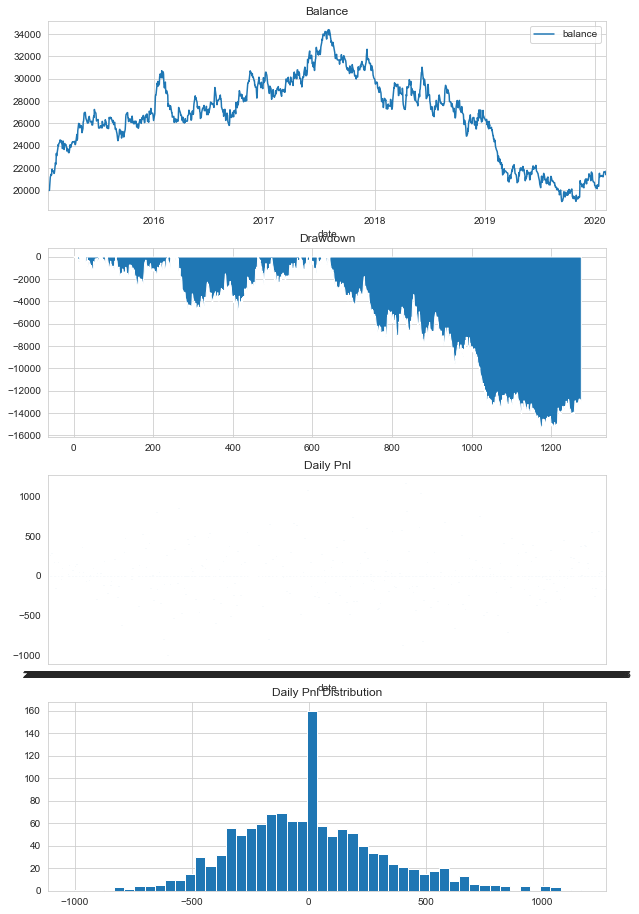

In [48]:
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [49]:
result = engine.get_all_daily_results()

In [50]:
for r in result:
    print(r.net_pnl)

0.0
0.0
476.9610000000014
338.3179999999993
378.119999999999
258.71300000000247
-79.60400000000391
288.56500000000324
248.762999999999
-166.8047500000005
0.0
-6.6875
-211.51491024999802
0.0
168.97675000000137
786.0909999999967
-159.20799999999872
258.71399999999994
726.3880000000017
-218.91200000000026
696.5369999999984
308.46700000000055
-89.55500000000029
172.15999999999894
131.67300000000068
202.57399999999961
-16.848999999996813
-111.83300000000192
93.0344999999984
-310.5957499999984
-43.4149999999988
-373.6914999999992
101.28699999999753
577.3350000000028
-754.1617500000023
0.0
489.9665000000018
40.51500000000033
-107.76025000000216
0.0
-216.99125
0.0
-356.97125
232.21624999999858
-70.90099999999893
-287.699710624999
20.257000000001426
-38.23825000000201
131.67300000000068
587.4639999999999
-222.83100000000104
-16.87211549999895
182.3160000000007
293.73199999999997
-40.51500000000033
67.94650000000038
0.0
0.0
0.0
31.406999999998476
-288.55824999999845
0.0
128.03313975000216
637.42